In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import association_rules, apriori # for mining frequent itemsets and association rule

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("bread basket.csv")
df

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend
...,...,...,...,...,...
20502,9682,Coffee,09-04-2017 14:32,afternoon,weekend
20503,9682,Tea,09-04-2017 14:32,afternoon,weekend
20504,9683,Coffee,09-04-2017 14:57,afternoon,weekend
20505,9683,Pastry,09-04-2017 14:57,afternoon,weekend


In [3]:
df.shape

(20507, 5)

In [4]:
df.info() #no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [5]:
print('The total number of unique transactions is ', df['Transaction'].nunique())
print('The total number of selling items is ', df['Item'].nunique())

The total number of unique transactions is  9465
The total number of selling items is  94


In [6]:
df['date_time'] = pd.to_datetime(df['date_time']) # converting into date format
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,2016-10-30 09:58:00,morning,weekend
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend
4,3,Jam,2016-10-30 10:07:00,morning,weekend


In [7]:
df['Item'] = df['Item'].str.strip()
df['Item'] = df['Item'].str.lower()
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,bread,2016-10-30 09:58:00,morning,weekend
1,2,scandinavian,2016-10-30 10:05:00,morning,weekend
2,2,scandinavian,2016-10-30 10:05:00,morning,weekend
3,3,hot chocolate,2016-10-30 10:07:00,morning,weekend
4,3,jam,2016-10-30 10:07:00,morning,weekend


In [8]:
df['month'] = df['date_time'].dt.strftime('%Y-%m')
df

,Transaction,Item,date_time,period_day,weekday_weekend,month
0,1,bread,2016-10-30 09:58:00,morning,weekend,2016-10
1,2,scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10
2,2,scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10
3,3,hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10
4,3,jam,2016-10-30 10:07:00,morning,weekend,2016-10
...,...,...,...,...,...,...
20502,9682,coffee,2017-04-09 14:32:00,afternoon,weekend,2017-04
20503,9682,tea,2017-04-09 14:32:00,afternoon,weekend,2017-04
20504,9683,coffee,2017-04-09 14:57:00,afternoon,weekend,2017-04
20505,9683,pastry,2017-04-09 14:57:00,afternoon,weekend,2017-04


In [9]:
top_items = pd.DataFrame(df['Item'].value_counts(dropna=True, sort=True)).reset_index()
top_items.columns = ['item', 'count']
top_items['percentage'] = top_items['count'].apply(lambda x: x/top_items['count'].sum())
top_items = top_items.head(20)
top_items.head()

,item,count,percentage
0,coffee,5471,0.266787
1,bread,3325,0.162140
2,tea,1435,0.069976
3,cake,1025,0.049983
4,pastry,856,0.041742


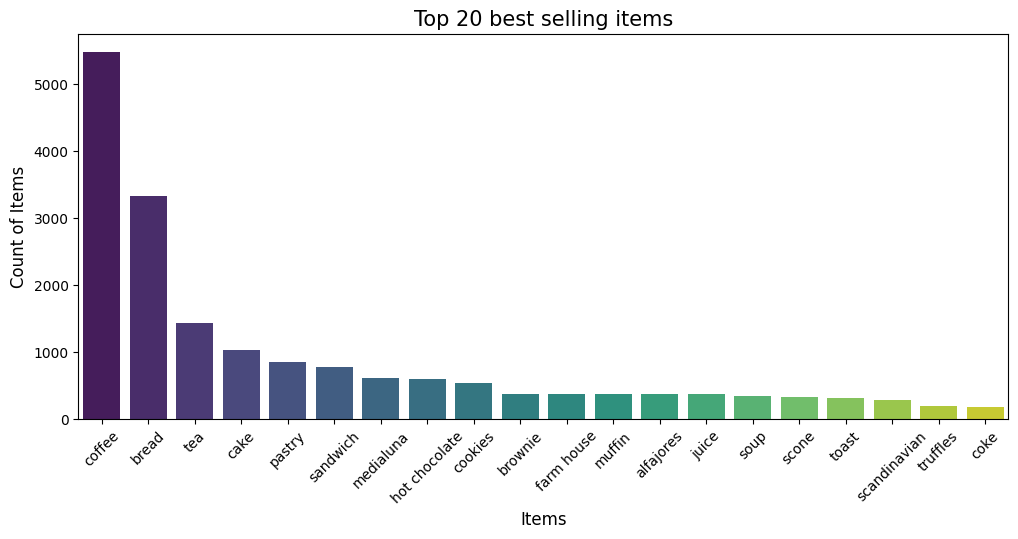

In [10]:
plt.figure(figsize=(12,5))
sns.barplot(x = 'item', y = 'count', data = top_items, palette = 'viridis')
plt.xlabel('Items', size = 12)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 12)
plt.title('Top 20 best selling items', size = 15)
plt.show()

In [11]:
items_num = df.groupby('Transaction', as_index=False)['Item'].count()
# pivot table to display the distribution of transactions by the number of items
items_num = items_num.pivot_table(index='Item', values='Transaction', aggfunc='count')
# calculate percentage
print(items_num)
items_num['percentage'] = items_num['Transaction'].apply(lambda x: x/items_num['Transaction'].sum())
items_num.drop('percentage', axis = 1, inplace = True)
items_num.reset_index(inplace=True)
items_num

      Transaction
Item             
1            3631
2            2908
3            1528
4             850
5             341
6             135
7              38
8              21
9               7
10              2
11              4


,Item,Transaction
0,1,3631
1,2,2908
2,3,1528
3,4,850
4,5,341
5,6,135
6,7,38
7,8,21
8,9,7
9,10,2


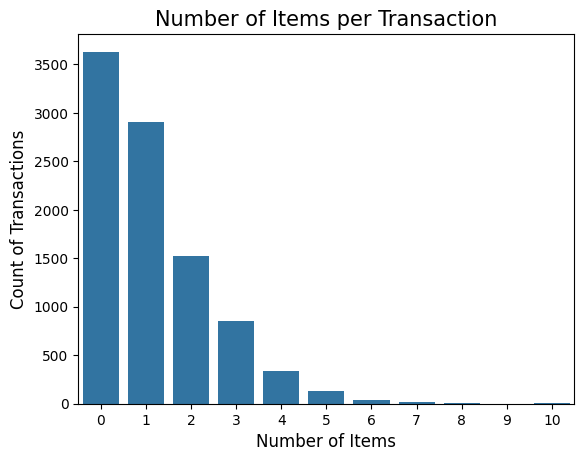

In [12]:
sns.barplot(x=items_num.index, y='Transaction' , data=items_num)
plt.xlabel('Number of Items', size = 12)
plt.ylabel('Count of Transactions', size = 12)
plt.title('Number of Items per Transaction', size = 15)
plt.show()

In [13]:
qty_month = df.groupby('month', as_index=False)['Transaction'].count()
qty_month

,month,Transaction
0,2016-10,369
1,2016-11,4436
2,2016-12,3339
3,2017-01,3356
4,2017-02,3906
5,2017-03,3944
6,2017-04,1157


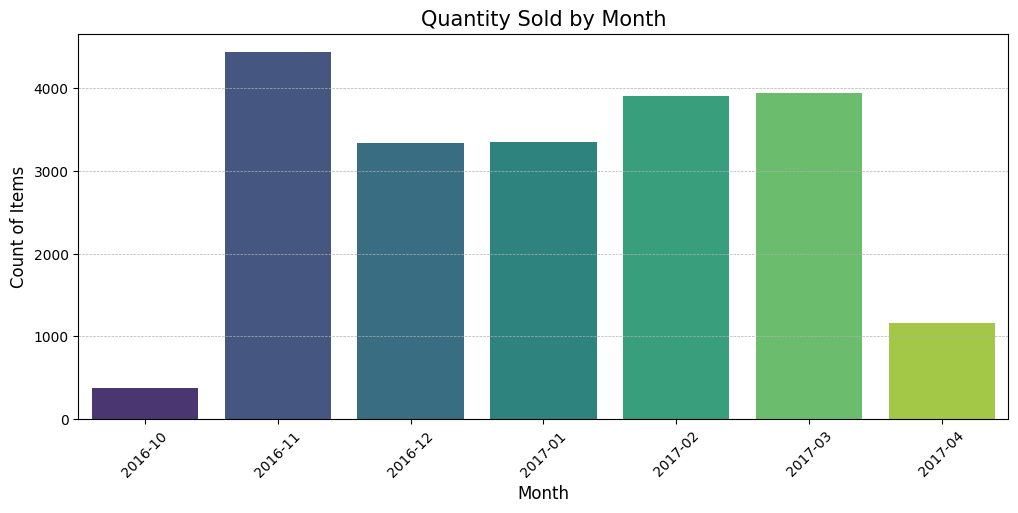

In [14]:
# create bar plot showing the number of items sold by month
plt.figure(figsize=(12,5))
sns.barplot(x = 'month', y = 'Transaction', data = qty_month, palette = 'viridis')
plt.xlabel('Month', size = 12)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 12)
plt.title('Quantity Sold by Month', size = 15)
plt.grid(axis = 'y', ls='--', lw='0.5')
plt.show()

In [15]:
transactions = df.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')
transactions.head()

,Transaction,Item,Count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1


In [16]:
my_basket = transactions.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='any').fillna(0)

my_basket.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
frequent_items = apriori(my_basket, min_support = 0.01, use_colnames = True)
frequent_items

,support,itemsets
0,0.036344,(alfajores)
1,0.016059,(baguette)
2,0.327205,(bread)
3,0.040042,(brownie)
4,0.103856,(cake)
...,...,...
56,0.023666,"(toast, coffee)"
57,0.014369,"(tea, sandwich)"
58,0.010037,"(cake, coffee, bread)"
59,0.011199,"(pastry, bread, coffee)"


In [18]:
rules = association_rules(frequent_items, metric = "lift", min_threshold = 1.2)
rules.sort_values('confidence', ascending = False, inplace = True)
rules.reset_index(drop=True, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
1,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
2,(cake),(tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
3,"(coffee, tea)",(cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962,0.509401
4,(sandwich),(tea),0.071844,0.142631,0.014369,0.200000,1.402222,0.004122,1.071712,0.309050
5,(hot chocolate),(cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125,0.498236
6,"(cake, coffee)",(tea),0.054728,0.142631,0.010037,0.183398,1.285822,0.002231,1.049923,0.235157
7,(tea),(cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
8,(pastry),"(coffee, bread)",0.086107,0.090016,0.011199,0.130061,1.444872,0.003448,1.046033,0.336907
9,"(coffee, bread)",(pastry),0.090016,0.086107,0.011199,0.124413,1.444872,0.003448,1.043749,0.338354


In [19]:
rules = association_rules(frequent_items, metric = "lift", min_threshold = 1.2)
rules.sort_values('lift', ascending = False, inplace = True)
rules.reset_index(drop=True, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(coffee, tea)",(cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962,0.509401
1,(cake),"(coffee, tea)",0.103856,0.049868,0.010037,0.096643,1.937977,0.004858,1.051779,0.540090
2,(cake),(hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910,0.523553
3,(hot chocolate),(cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125,0.498236
4,(tea),(cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
5,(cake),(tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
6,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
7,(coffee),(toast),0.478394,0.033597,0.023666,0.049470,1.472431,0.007593,1.016699,0.615122
8,"(coffee, bread)",(pastry),0.090016,0.086107,0.011199,0.124413,1.444872,0.003448,1.043749,0.338354
9,(pastry),"(coffee, bread)",0.086107,0.090016,0.011199,0.130061,1.444872,0.003448,1.046033,0.336907


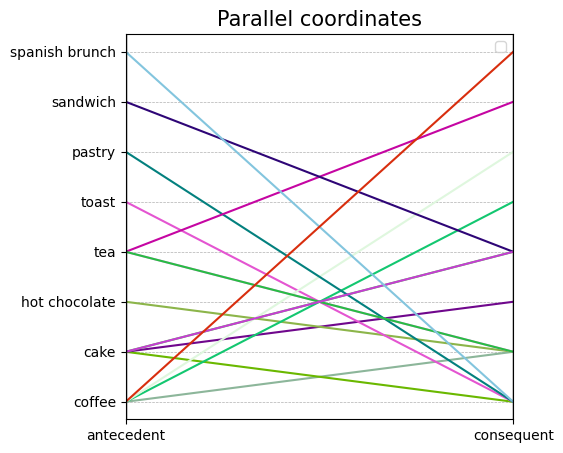

In [20]:
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

# import sub lib to plot parallel coordinates
from pandas.plotting import parallel_coordinates

# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(rules)

# Generate parallel coordinates plot
plt.figure(figsize=(5,5))
parallel_coordinates(coords, 'rule')
plt.legend([])
plt.grid(ls='--', lw='0.5')
plt.title('Parallel coordinates', size = 15)
plt.show()

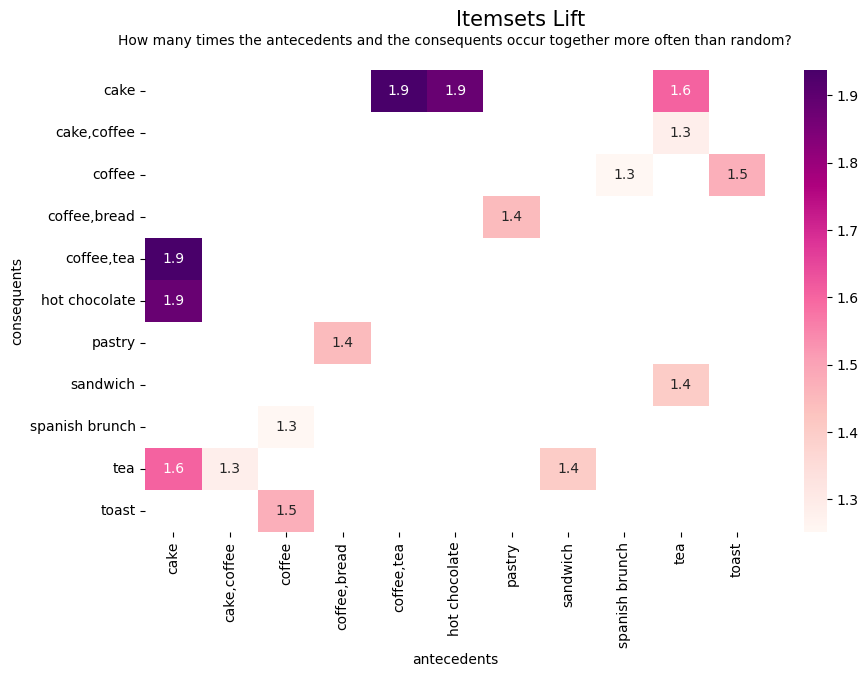

In [21]:
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# transform antecedent, consequent, and support columns into matrix
support_table_lift = rules.pivot(index='consequents', columns='antecedents', values='lift')

# generate a heatmap with annotations 
plt.figure(figsize=(10,6))
sns.heatmap(support_table_lift, annot = True, cbar = True, cmap="RdPu")
plt.suptitle('Itemsets Lift', size = 15)
plt.title('How many times the antecedents and the consequents occur together more often than random?\n', size=10)
plt.show()

       antecedents consequents  antecedent support  consequent support  \
0       coffee,tea        cake            0.049868            0.103856   
5             cake         tea            0.103856            0.142631   
6            toast      coffee            0.033597            0.478394   
11        sandwich         tea            0.071844            0.142631   
14  spanish brunch      coffee            0.018172            0.478394   

     support  confidence      lift  leverage  conviction  zhangs_metric  \
0   0.010037    0.201271  1.937977  0.004858    1.121962       0.509401   
5   0.023772    0.228891  1.604781  0.008959    1.111865       0.420538   
6   0.023666    0.704403  1.472431  0.007593    1.764582       0.332006   
11  0.014369    0.200000  1.402222  0.004122    1.071712       0.309050   
14  0.010882    0.598837  1.251766  0.002189    1.300235       0.204851   

        antecedent consequent  rule  
0           coffee       cake     0  
5             cake        te

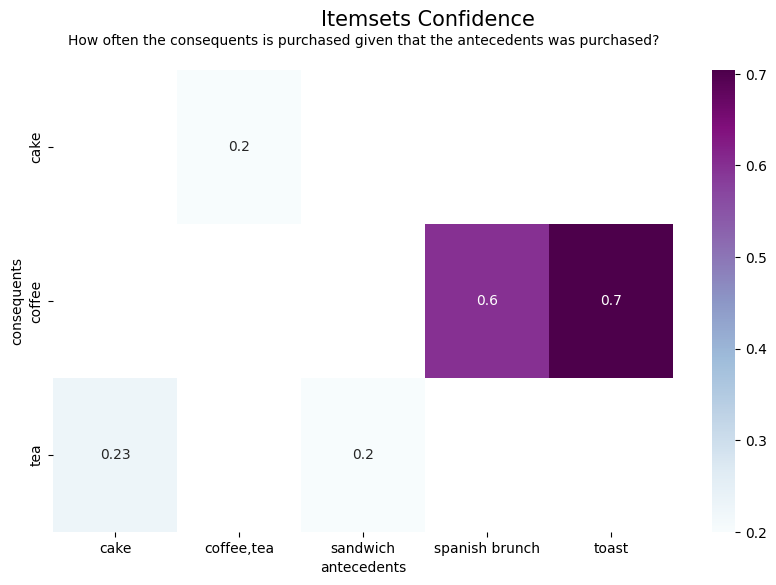

In [24]:
print(rules[rules['confidence']>=0.2])
rules_confidence = rules[rules['confidence']>=0.2] # select min lift=1.2
support_table_conf = rules_confidence.pivot(index='consequents', columns='antecedents', values='confidence')
print(support_table_conf )
# generate a heatmap with annotations
plt.figure(figsize=(10,6))
sns.heatmap(support_table_conf, annot = True, cbar = True, cmap="BuPu")
plt.suptitle('Itemsets Confidence', size = 15)
plt.title('How often the consequents is purchased given that the antecedents was purchased?\n', size = 10)
plt.show()